In [1]:
#  对应的 哔哩哔哩 视频讲解
#  https://www.bilibili.com/video/BV1VW411g79V/?spm_id_from=333.999.0.0&vd_source=b0fa6bce2d8bcdeb62f557286750afd0

# 导入数据
import h5py 

In [2]:
# 如果提示了Unable to open file (unable to open file: name = 'D:\juypternaconda\datasets	rain_catvnoncat.h5', errno = 22, error message = 'Invalid argument', flags = 0, o_flags = 0这个错误，需要这么修改路径
# train_data=h5py.File(r'D:\juypter\anaconda\datasets\train_catvnoncat.h5','r')
# test_data=h5py.File(r'D:\juypter\anaconda\datasets\test_catvnoncat.h5','r')
# 在Up主的路径前加上r，并且要把数据集放到anaconda文件夹下中

# 训练 原始数据
train_dataset = h5py.File(r'D:\Program Files\Anaconda\0-binary-classification\train_catvnoncat.h5','r')

test_dataset = h5py.File(r'D:\Program Files\Anaconda\0-binary-classification\test_catvnoncat.h5','r')



In [3]:
for key in train_dataset.keys():
    print(key)

list_classes
train_set_x
train_set_y


In [4]:
train_dataset['train_set_x'].shape


(209, 64, 64, 3)

In [5]:
train_dataset['train_set_y'].shape

(209,)

In [6]:
for key in test_dataset.keys():
    print(key)

list_classes
test_set_x
test_set_y


In [7]:


test_dataset['test_set_x'].shape

(50, 64, 64, 3)

In [8]:
test_dataset['test_set_y'].shape

(50,)

In [9]:
# 取出 训练集 和 测试集

train_data_org = train_dataset['train_set_x'][:]
train_label_org = train_dataset['train_set_y'][:]

test_data_org = test_dataset['test_set_x'][:]
test_label_org = test_dataset['test_set_y'][:]

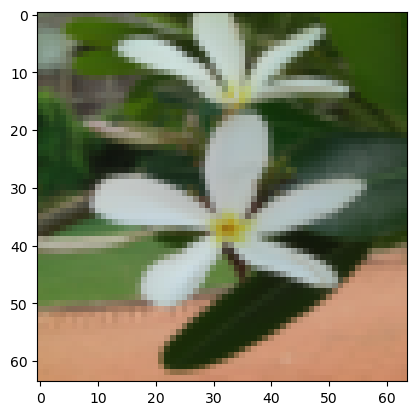

In [10]:
#  查看图片
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_data_org[176])

In [11]:
# 数据维度的处理

m_train = train_data_org.shape[0]
m_test = test_data_org.shape[0]

print(m_train, m_test)  # 样本数

209 50


In [12]:
train_data_tran = train_data_org.reshape(m_train,-1).T
test_data_tran = test_data_org.reshape(m_test,-1).T

print(train_data_tran.shape, test_data_tran.shape)

(12288, 209) (12288, 50)


In [13]:
import numpy as np

train_label_tran = train_label_org[np.newaxis,:]
test_label_tran = test_label_org[np.newaxis,:]

print(train_label_tran.shape)

(1, 209)


In [14]:
#  标准化 数据
print(train_data_tran[0:9,0:9])   # 查看 数据 大小

[[ 17 196  82   1   9  84  56  19  63]
 [ 31 192  71  22   9  79  57  22  68]
 [ 56 190  68   2   5  50  23   2  61]
 [ 22 193  89   1  10  84  52  23  64]
 [ 33 186  83  14   9  79  55  26  68]
 [ 59 182  83   2   6  51  19   2  60]
 [ 25 188 100   1   9  77  43  27  68]
 [ 35 179  98  13   9  72  53  29  71]
 [ 62 174 104   1   6  44  17   2  58]]


In [15]:
train_data_sta = train_data_tran / 255
test_data_sta = test_data_tran / 255

In [16]:
print(train_data_sta[0:9,0:9])   # 查看 数据 大小


[[0.06666667 0.76862745 0.32156863 0.00392157 0.03529412 0.32941176
  0.21960784 0.0745098  0.24705882]
 [0.12156863 0.75294118 0.27843137 0.08627451 0.03529412 0.30980392
  0.22352941 0.08627451 0.26666667]
 [0.21960784 0.74509804 0.26666667 0.00784314 0.01960784 0.19607843
  0.09019608 0.00784314 0.23921569]
 [0.08627451 0.75686275 0.34901961 0.00392157 0.03921569 0.32941176
  0.20392157 0.09019608 0.25098039]
 [0.12941176 0.72941176 0.3254902  0.05490196 0.03529412 0.30980392
  0.21568627 0.10196078 0.26666667]
 [0.23137255 0.71372549 0.3254902  0.00784314 0.02352941 0.2
  0.0745098  0.00784314 0.23529412]
 [0.09803922 0.7372549  0.39215686 0.00392157 0.03529412 0.30196078
  0.16862745 0.10588235 0.26666667]
 [0.1372549  0.70196078 0.38431373 0.05098039 0.03529412 0.28235294
  0.20784314 0.11372549 0.27843137]
 [0.24313725 0.68235294 0.40784314 0.00392157 0.02352941 0.17254902
  0.06666667 0.00784314 0.22745098]]


In [17]:
# 定义 sigmoid 函数
def sigmoid(z):
    a = 1 / (1+np.exp(-z))
    return a

In [18]:
#  参数初始化
n_dim = train_data_sta.shape[0]
w = np.zeros((n_dim,1))
b = 0

In [19]:
# 定义 前向传播函数  代价函数  以及 梯度下降
def propagate(w,b,X,y):
    
    # 1. 前向传播函数
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)
    
    # 2. 代价函数
    m = X.shape[1]
    J = -1/m * np.sum( y * np.log(A) + (1-y) * np.log(1-A) )
    
    # 3. 梯度下降函数
    dw = 1/m * np.dot(X,(A-y).T)
    db = 1/m * np.sum(A-y)
    
    grands = {'dw':dw,'db':db}
    
    return grands, J

In [20]:
# 优化部分
def optimize(w,b,X,y,alpha,n_iters,print_cost):
    costs = []
    
    for i in range(n_iters):
        grands, J = propagate(w,b,X,y)
        dw = grands['dw']
        db = grands['db']
        
        w = w - alpha * dw
        b = b - alpha * db
        
        if i % 100 == 0:
            costs.append(J)
            if print_cost:
                print('n_iters is', i, 'cost is', J)
    
    grands = {'dw':dw,'db':db}
    params = {'w':w,'b':b}
    
    
    return grands, params, costs
        
        

In [21]:
# 预测部分
def predict(w,b,X_test):
    
    Z = np.dot(w.T,X_test) + b
    A = sigmoid(Z)
    
    m = X_test.shape[1]
    y_pred = np.zeros((1,m))
    
    for i in range(m):
        if A[:,i] > 0.5:
            y_pred[:,i] = 1
        else:
            y_pred[:,i] = 0
    return y_pred
                

In [22]:
# 模型 的整合
def model(w,b,X_train,y_train,X_test,y_test,alpha,n_iters,print_cost):
    
    grands, params, costs = optimize(w,b,X_train,y_train,alpha,n_iters,print_cost)
    w = params['w']
    b = params['b']
    
    y_pred_train = predict(w,b,X_train)
    y_pred_test = predict(w,b,X_test)
    
    print('the train acc is', np.mean(y_pred_train == y_train) * 100,'%' )
    print('the test acc is', np.mean(y_pred_test == y_test) * 100,'%' )
    
    d = {
        'w' : w,
        'b' : b,
        'costs':costs,
        'y_pred_train':y_pred_train,
        'y_pred_test':y_pred_test,
        'alpha':alpha
    }
    return d
    
    

In [23]:
d = model(w,b,train_data_sta,train_label_tran,test_data_sta,test_label_tran,alpha=0.005,n_iters=2000,print_cost=False)

the train acc is 99.04306220095694 %
the test acc is 70.0 %


Text(0, 0.5, 'costs')

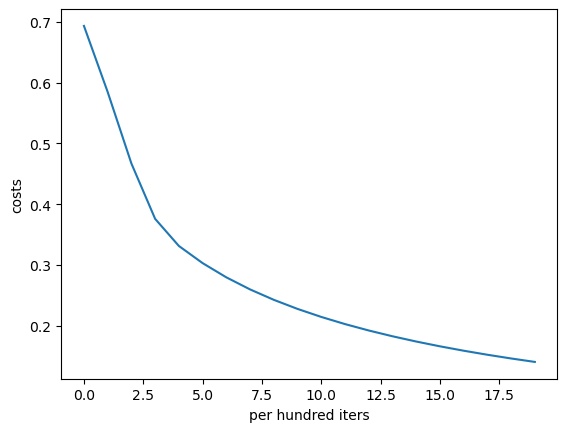

In [24]:
plt.plot(d['costs'])
plt.xlabel('per hundred iters')
plt.ylabel('costs')

In [25]:
index = 45
print('y is', test_label_tran[0,index])
print('y_prediction is',int(d['y_pred_train'][0,index]) )

y is 0
y_prediction is 0


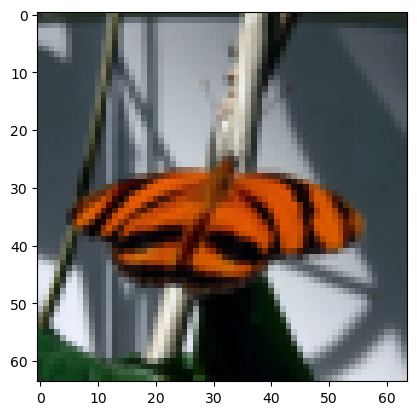

In [26]:
plt.imshow(test_data_org[index])

alpha =  0.01
the train acc is 99.52153110047847 %
the test acc is 70.0 %
alpha =  0.001
the train acc is 91.38755980861244 %
the test acc is 68.0 %
alpha =  0.0001
the train acc is 71.29186602870813 %
the test acc is 40.0 %


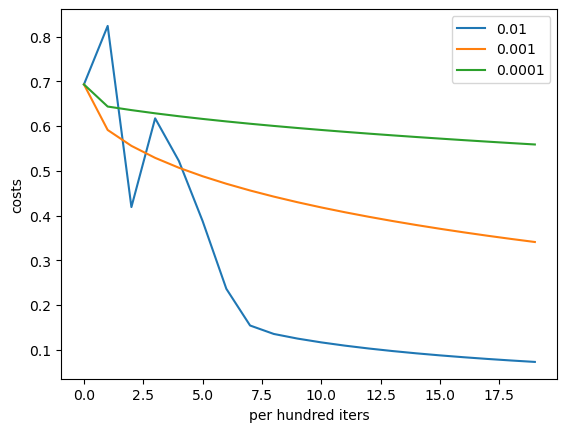

In [27]:
alphas = [0.01,0.001,0.0001]
for i in alphas:
    
    print('alpha = ', i)
    d = model(w,b,train_data_sta,train_label_tran,test_data_sta,test_label_tran,alpha=i,n_iters=2000, print_cost = False)
    print('================================================')
    
    plt.plot(d['costs'],label=str(i))
    plt.xlabel('per hundred iters')
    plt.ylabel('costs')
    plt.legend()

(666, 500, 3)


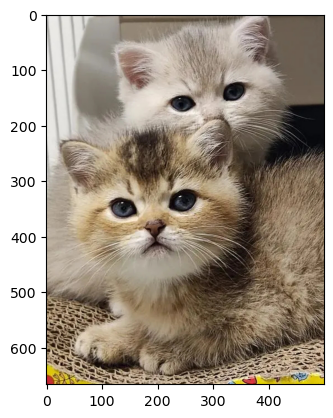

In [28]:
#  导入 并 查看 图片

path = 'D:/Program Files/Anaconda/0-binary-classification/cat5.jpg'

image = plt.imread(path)

print(image.shape)
plt.imshow(image)

In [29]:
from skimage import transform
image_tran = transform.resize(image,(64,64,3)).reshape(64*64*3,1)
image_tran.shape

C:\Users\74491\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


(12288, 1)

In [30]:
ydd = predict(d['w'],d['b'],image_tran)
print(int(ydd))

0
